数据集描述

In [ ]:
import xarray as xr

def inspect_dataset(data_path):
    # 加载数据集
    ds = xr.open_dataset(data_path)

    print("==== 数据集基本信息 ====")
    print(ds)  # 输出整个数据集的概览

    print("\n==== 变量列表及基本属性 ====")
    for var_name in ds.data_vars:
        var = ds[var_name]
        print(f"变量名: {var_name}")
        print(f"  - 尺寸(dimensions): {var.dims}")
        print(f"  - 形状(shape): {var.shape}")
        # 可选：输出该变量的一些统计信息
        print(f"  - 最小值: {float(var.min().values):.3f}, 最大值: {float(var.max().values):.3f}")
        print(f"  - 均值: {float(var.mean().values):.3f}")
        print("-" * 40)

    print("\n==== 坐标信息 ====")
    for coord_name in ds.coords:
        coord = ds[coord_name]
        print(f"坐标名: {coord_name}")
        print(f"  - 尺寸(dimensions): {coord.dims}")
        print(f"  - 形状(shape): {coord.shape}")
        print("-" * 40)

# 使用示例
data_path = "/content/drive/MyDrive/weather_forecast_project/data/processed_features.nc"  # 替换为实际数据文件路径
inspect_dataset(data_path)


==== 数据集基本信息 ====
<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 41612, latitude: 41, longitude: 61, channel: 9)
Coordinates:
    month       (valid_time) float32 166kB ...
    year        (valid_time) float32 166kB ...
  * valid_time  (valid_time) float32 166kB 2.867e+17 2.867e+17 ... 1.601e+18
  * latitude    (latitude) float32 164B 55.0 54.75 54.5 ... 45.5 45.25 45.0
  * longitude   (longitude) float32 244B 5.0 5.25 5.5 5.75 ... 19.5 19.75 20.0
Dimensions without coordinates: channel
Data variables:
    t2m         (valid_time, latitude, longitude, channel) float32 4GB ...

==== 变量列表及基本属性 ====
变量名: t2m
  - 尺寸(dimensions): ('valid_time', 'latitude', 'longitude', 'channel')
  - 形状(shape): (41612, 41, 61, 9)
  - 最小值: -20.170, 最大值: 105128.375
  - 均值: 2347.767
----------------------------------------

==== 坐标信息 ====
坐标名: month
  - 尺寸(dimensions): ('valid_time',)
  - 形状(shape): (41612,)
----------------------------------------
坐标名: year
  - 尺寸(dimensions): ('valid_time',)
  - 形状(

环境部署

In [ ]:
!apt-get update
!apt-get install -y cuda-nvrtc-12-2

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,306 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,640 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [ ]:
!pip uninstall -y cupy-cuda11x cupy-cuda12x cupy

Found existing installation: cupy-cuda12x 13.3.0
Uninstalling cupy-cuda12x-13.3.0:
  Successfully uninstalled cupy-cuda12x-13.3.0


In [ ]:
!pip install -q cupy-cuda12x==12.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 MB 3.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import time

# 首先只测试CPU功能
print("CPU Test:")
print("-" * 50)
size = 1000000
cpu_array = np.random.rand(size)
start = time.time()
cpu_result = np.sum(np.sin(cpu_array))
cpu_time = time.time() - start
print(f"CPU computation time: {cpu_time:.4f} seconds")

# 然后尝试导入和测试GPU功能
print("\nGPU Test:")
print("-" * 50)
try:
    import cupy as cp
    print("CuPy successfully imported")
    print(f"CuPy version: {cp.__version__}")

    # 检查CUDA环境变量
    cuda_path = os.environ.get('CUDA_PATH', 'Not set')
    print(f"CUDA_PATH: {cuda_path}")

    # 获取GPU信息
    device_count = cp.cuda.runtime.getDeviceCount()
    print(f"Number of GPUs: {device_count}")

    if device_count > 0:
        device = cp.cuda.runtime.getDeviceProperties(0)
        print(f"GPU Name: {device['name'].decode()}")
        print(f"Total memory: {device['totalGlobalMem'] / 1e9:.2f} GB")

        # GPU计算测试
        start = time.time()
        gpu_array = cp.random.rand(size)
        gpu_result = cp.sum(cp.sin(gpu_array))
        cp.cuda.stream.get_current_stream().synchronize()
        gpu_time = time.time() - start
        print(f"\nGPU computation time: {gpu_time:.4f} seconds")
        print(f"GPU speedup: {cpu_time/gpu_time:.2f}x")

except Exception as e:
    print(f"Error during GPU test: {str(e)}")
    print("\nDetailed error information:")
    import traceback
    traceback.print_exc()

CPU Test:
--------------------------------------------------
CPU computation time: 0.0136 seconds

GPU Test:
--------------------------------------------------
CuPy successfully imported
CuPy version: 12.2.0
CUDA_PATH: Not set
Number of GPUs: 1
GPU Name: Tesla T4
Total memory: 15.84 GB

GPU computation time: 0.8626 seconds
GPU speedup: 0.02x


GPU主成分测试

Loading data...
Preprocessing data...
Preprocessed data shape: (41612, 22509)

Performing GPU PCA...
Input data shape: (41612, 22509)
Standardizing data...
Moving data to GPU...
GPU Memory Used: 3.49 GB
GPU Memory Total: 3.49 GB
Computing covariance matrix...
GPU Memory Used: 5.38 GB
GPU Memory Total: 7.26 GB
Computing eigendecomposition...
Selected 266 components
Transforming data in batches...
PCA completed in 80.93 seconds


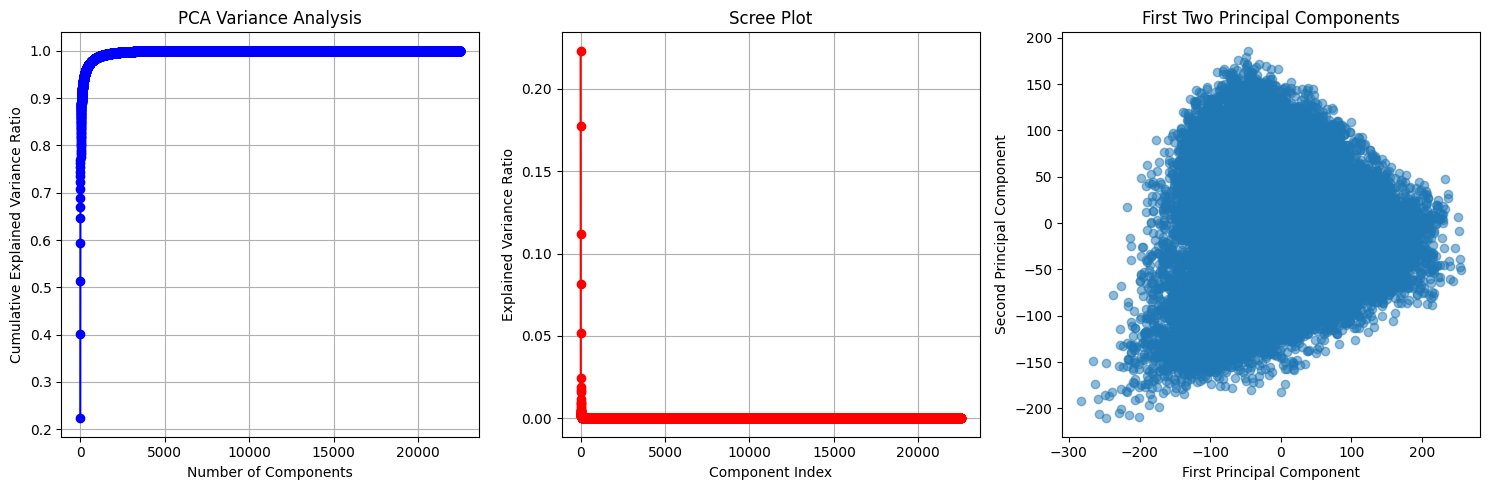

In [ ]:
# 导入必要的库
import xarray as xr
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gc
import time
import warnings
warnings.filterwarnings('ignore')

class GPUPCAProcessor:
    def __init__(self, batch_size=1000, n_components=None):
        """
        初始化GPU PCA处理器

        Args:
            batch_size (int): 批处理大小
            n_components (int): PCA组件数量，None则自动确定
        """
        self.batch_size = batch_size
        self.n_components = n_components
        self.scaler = StandardScaler()

    def _memory_stats(self):
        """输出当前GPU内存使用情况"""
        mempool = cp.get_default_memory_pool()
        print(f"GPU Memory Used: {mempool.used_bytes() / 1024**3:.2f} GB")
        print(f"GPU Memory Total: {mempool.total_bytes() / 1024**3:.2f} GB")

    def _clean_gpu_memory(self):
        """清理GPU内存"""
        mempool = cp.get_default_memory_pool()
        pinned_mempool = cp.get_default_pinned_memory_pool()
        mempool.free_all_blocks()
        pinned_mempool.free_all_blocks()

    def preprocess_data(self, data, feature_dims=['latitude', 'longitude']):
        """
        预处理数据

        Args:
            data (xarray.Dataset 或 xarray.DataArray): 输入数据
            feature_dims (list): 要作为特征的维度

        Returns:
            numpy.ndarray: 处理后的数据
        """
        print("Preprocessing data...")

        try:
            # 如果输入是Dataset，则选择其中一个变量
            if isinstance(data, xr.Dataset):
                # 选择第一个数据变量；可以根据需求指定特定变量名
                data = list(data.data_vars.values())[0]

            # 将数据重塑为2D数组
            other_dims = [dim for dim in data.dims if dim not in ['valid_time'] + feature_dims]
            stacked_data = data.stack(features=feature_dims + other_dims)

            # 转换为numpy数组
            array_data = stacked_data.to_numpy()

            # 确保数据为数值类型
            if not np.issubdtype(array_data.dtype, np.number):
                try:
                    array_data = array_data.astype(np.float64)
                except Exception as e:
                    print(f"Error converting data to float: {e}")
                    return None

            # 删除任何缺失值的行
            valid_rows = ~np.isnan(array_data).any(axis=1)
            cleaned_data = array_data[valid_rows]

            print(f"Preprocessed data shape: {cleaned_data.shape}")
            return cleaned_data

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return None
        finally:
            gc.collect()


    def fit_transform(self, data):
        """
        使用GPU执行PCA

        Args:
            data (numpy.ndarray): 输入数据矩阵

        Returns:
            dict: PCA结果
        """
        print("\nPerforming GPU PCA...")
        start_time = time.time()

        try:
            n_samples, n_features = data.shape
            print(f"Input data shape: {data.shape}")

            # 批量标准化
            print("Standardizing data...")
            data_standardized = self.scaler.fit_transform(data)

            # 转移到GPU
            print("Moving data to GPU...")
            data_gpu = cp.asarray(data_standardized)
            self._memory_stats()

            # 计算协方差矩阵
            print("Computing covariance matrix...")
            cov_matrix = cp.dot(data_gpu.T, data_gpu) / (n_samples - 1)
            self._memory_stats()

            # 释放原始数据的GPU内存
            del data_gpu
            self._clean_gpu_memory()

            # 计算特征值和特征向量
            print("Computing eigendecomposition...")
            eigenvalues, eigenvectors = cp.linalg.eigh(cov_matrix)

            # 对特征值进行排序
            idx = cp.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idx]
            eigenvectors = eigenvectors[:, idx]

            # 确定组件数量
            if self.n_components is None:
                explained_variance_ratio = eigenvalues / eigenvalues.sum()
                cumsum = cp.cumsum(explained_variance_ratio)
                self.n_components = int(cp.argmax(cumsum >= 0.95)) + 1

            print(f"Selected {self.n_components} components")

            # 选择主成分
            components = eigenvectors[:, :self.n_components].T

            # 批量转换数据
            print("Transforming data in batches...")
            transformed_data = np.zeros((n_samples, self.n_components))

            for i in range(0, n_samples, self.batch_size):
                batch_end = min(i + self.batch_size, n_samples)
                batch = cp.asarray(data_standardized[i:batch_end])
                transformed_batch = cp.dot(batch, components.T)
                transformed_data[i:batch_end] = cp.asnumpy(transformed_batch)
                del batch, transformed_batch
                self._clean_gpu_memory()

            # 准备结果
            results = {
                'transformed_data': transformed_data,
                'components': cp.asnumpy(components),
                'explained_variance_ratio': cp.asnumpy(eigenvalues / eigenvalues.sum()),
                'n_components': self.n_components
            }

            print(f"PCA completed in {time.time() - start_time:.2f} seconds")
            return results

        except Exception as e:
            print(f"Error in PCA computation: {str(e)}")
            return None

        finally:
            self._clean_gpu_memory()
            gc.collect()

    def plot_results(self, results):
        """
        可视化PCA结果

        Args:
            results (dict): PCA结果字典
        """
        if results is None:
            print("No results to plot")
            return

        plt.figure(figsize=(15, 5))

        # 绘制解释方差比
        plt.subplot(131)
        cumsum = np.cumsum(results['explained_variance_ratio'])
        plt.plot(cumsum, 'b-', marker='o')
        plt.grid(True)
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('PCA Variance Analysis')

        # 绘制碎石图
        plt.subplot(132)
        plt.plot(results['explained_variance_ratio'], 'r-', marker='o')
        plt.grid(True)
        plt.xlabel('Component Index')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot')

        # 绘制前两个主成分
        plt.subplot(133)
        plt.scatter(results['transformed_data'][:, 0],
                   results['transformed_data'][:, 1],
                   alpha=0.5)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('First Two Principal Components')

        plt.tight_layout()
        plt.show()

def run_gpu_pca_analysis(data_path, batch_size=1000):
    """
    运行GPU PCA分析的主函数

    Args:
        data_path (str): 数据文件路径
        batch_size (int): 批处理大小
    """
    try:
        # 加载数据
        print("Loading data...")
        ds = xr.open_dataset(data_path)

        # 创建GPU PCA处理器
        processor = GPUPCAProcessor(batch_size=batch_size)

        # 预处理数据
        preprocessed_data = processor.preprocess_data(ds)
        if preprocessed_data is None:
            raise ValueError("Data preprocessing failed")

        # 执行PCA
        results = processor.fit_transform(preprocessed_data)
        if results is None:
            raise ValueError("PCA computation failed")

        # 绘制结果
        processor.plot_results(results)

        return results

    except Exception as e:
        print(f"Error in analysis: {str(e)}")
        return None

    finally:
        # 清理内存
        gc.collect()

if __name__ == "__main__":
    # 设置实际的数据文件路径
    data_path = "/content/drive/MyDrive/weather_forecast_project/data/processed_features.nc"

    try:
        # 运行分析
        results = run_gpu_pca_analysis(
            data_path,
            batch_size=1000  # 可以根据GPU内存调整
        )

        if results is not None:
            print("\nAnalysis completed successfully!")
            print(f"Number of components: {results['n_components']}")
            print(f"Explained variance ratio (first 5): {results['explained_variance_ratio'][:5]}")

    except Exception as e:
        print(f"Error in main execution: {str(e)}")

PCA变量筛选

预处理数据：空间平均至通道维度...
空间平均后数据形状: (41612, 9)
预处理后数据形状: (41612, 9)

Performing GPU PCA...
Input data shape: (41612, 9)
Standardizing data...
Moving data to GPU...
GPU Memory Used: 0.00 GB
GPU Memory Total: 0.00 GB
Computing covariance matrix...
GPU Memory Used: 0.00 GB
GPU Memory Total: 0.00 GB
Computing eigendecomposition...
Selected 6 components
Transforming data in batches...
PCA completed in 0.04 seconds

==== 通道重要性评分 ====
通道 0: 重要性评分 0.2557
通道 1: 重要性评分 0.2582
通道 2: 重要性评分 0.2940
通道 3: 重要性评分 0.2520
通道 4: 重要性评分 0.2433
通道 5: 重要性评分 0.2473
通道 6: 重要性评分 0.2747
通道 7: 重要性评分 0.2392
通道 8: 重要性评分 0.2835


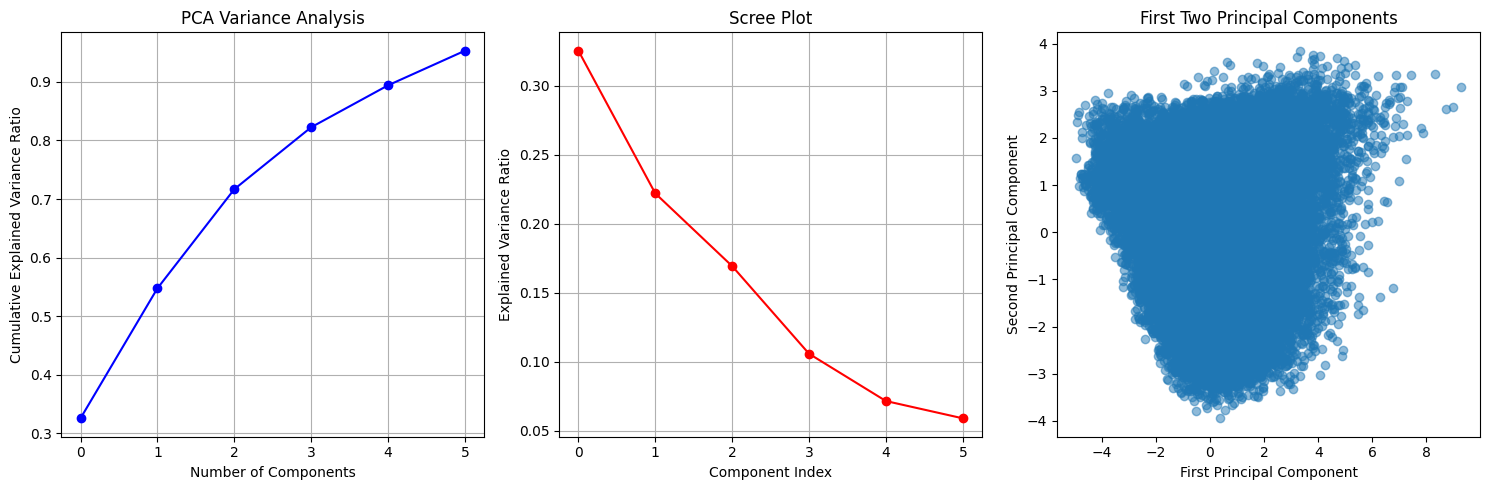

In [ ]:
import xarray as xr
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gc
import time
import warnings
warnings.filterwarnings('ignore')

class GPUPCAProcessor:
    def __init__(self, batch_size=1000, n_components=None):
        """
        初始化GPU PCA处理器

        Args:
            batch_size (int): 批处理大小
            n_components (int): PCA组件数量，None则自动确定
        """
        self.batch_size = batch_size
        self.n_components = n_components
        self.scaler = StandardScaler()

    def _memory_stats(self):
        """输出当前GPU内存使用情况"""
        mempool = cp.get_default_memory_pool()
        print(f"GPU Memory Used: {mempool.used_bytes() / 1024**3:.2f} GB")
        print(f"GPU Memory Total: {mempool.total_bytes() / 1024**3:.2f} GB")

    def _clean_gpu_memory(self):
        """清理GPU内存"""
        mempool = cp.get_default_memory_pool()
        pinned_mempool = cp.get_default_pinned_memory_pool()
        mempool.free_all_blocks()
        pinned_mempool.free_all_blocks()

    def preprocess_data_avg_spatial(self, data):
        """
        对输入数据进行预处理，通过对空间维度取平均来聚焦通道特征

        Args:
            data (xarray.Dataset 或 xarray.DataArray): 输入数据

        Returns:
            numpy.ndarray: 形状为 (valid_time, channel) 的处理后数据
        """
        print("预处理数据：空间平均至通道维度...")

        try:
            # 如果输入是 Dataset，则选择指定变量 't2m'
            if isinstance(data, xr.Dataset):
                data = data['t2m']

            # 对 latitude 和 longitude 维度取平均
            data_avg = data.mean(dim=['latitude', 'longitude'])
            print(f"空间平均后数据形状: {data_avg.shape}")

            # 转换为 numpy 数组
            array_data = data_avg.to_numpy()

            # 确保数据为数值类型
            if not np.issubdtype(array_data.dtype, np.number):
                try:
                    array_data = array_data.astype(np.float64)
                except Exception as e:
                    print(f"转换数据为 float 失败: {e}")
                    return None

            # 处理缺失值
            valid_rows = ~np.isnan(array_data).any(axis=1)
            cleaned_data = array_data[valid_rows]

            print(f"预处理后数据形状: {cleaned_data.shape}")
            return cleaned_data

        except Exception as e:
            print(f"预处理出错: {str(e)}")
            return None
        finally:
            gc.collect()

    def fit_transform(self, data):
        """
        使用GPU执行PCA

        Args:
            data (numpy.ndarray): 输入数据矩阵

        Returns:
            dict: PCA结果
        """
        print("\nPerforming GPU PCA...")
        start_time = time.time()

        try:
            n_samples, n_features = data.shape
            print(f"Input data shape: {data.shape}")

            # 批量标准化
            print("Standardizing data...")
            data_standardized = self.scaler.fit_transform(data)

            # 转移到GPU
            print("Moving data to GPU...")
            data_gpu = cp.asarray(data_standardized)
            self._memory_stats()

            # 计算协方差矩阵
            print("Computing covariance matrix...")
            cov_matrix = cp.dot(data_gpu.T, data_gpu) / (n_samples - 1)
            self._memory_stats()

            # 释放原始数据的GPU内存
            del data_gpu
            self._clean_gpu_memory()

            # 计算特征值和特征向量
            print("Computing eigendecomposition...")
            eigenvalues, eigenvectors = cp.linalg.eigh(cov_matrix)

            # 对特征值进行排序
            idx = cp.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idx]
            eigenvectors = eigenvectors[:, idx]

            # 确定组件数量
            if self.n_components is None:
                explained_variance_ratio = eigenvalues / eigenvalues.sum()
                cumsum = cp.cumsum(explained_variance_ratio)
                self.n_components = int(cp.argmax(cumsum >= 0.95)) + 1

            print(f"Selected {self.n_components} components")

            # 选择主成分
            components = eigenvectors[:, :self.n_components].T

            # 批量转换数据
            print("Transforming data in batches...")
            transformed_data = np.zeros((n_samples, self.n_components))

            for i in range(0, n_samples, self.batch_size):
                batch_end = min(i + self.batch_size, n_samples)
                batch = cp.asarray(data_standardized[i:batch_end])
                transformed_batch = cp.dot(batch, components.T)
                transformed_data[i:batch_end] = cp.asnumpy(transformed_batch)
                del batch, transformed_batch
                self._clean_gpu_memory()

            # 截断解释方差比率以匹配选定的组件数量
            explained_variance_ratio = cp.asnumpy(eigenvalues / eigenvalues.sum())[:self.n_components]

            # 准备结果
            results = {
                'transformed_data': transformed_data,
                'components': cp.asnumpy(components),
                'explained_variance_ratio': explained_variance_ratio,
                'n_components': self.n_components
            }

            print(f"PCA completed in {time.time() - start_time:.2f} seconds")
            return results

        except Exception as e:
            print(f"Error in PCA computation: {str(e)}")
            return None

        finally:
            self._clean_gpu_memory()
            gc.collect()

    def plot_results(self, results):
        """
        可视化PCA结果

        Args:
            results (dict): PCA结果字典
        """
        if results is None:
            print("No results to plot")
            return

        plt.figure(figsize=(15, 5))

        # 绘制解释方差比
        plt.subplot(131)
        cumsum = np.cumsum(results['explained_variance_ratio'])
        plt.plot(cumsum, 'b-', marker='o')
        plt.grid(True)
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('PCA Variance Analysis')

        # 绘制碎石图
        plt.subplot(132)
        plt.plot(results['explained_variance_ratio'], 'r-', marker='o')
        plt.grid(True)
        plt.xlabel('Component Index')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot')

        # 绘制前两个主成分
        plt.subplot(133)
        plt.scatter(results['transformed_data'][:, 0],
                   results['transformed_data'][:, 1],
                   alpha=0.5)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('First Two Principal Components')

        plt.tight_layout()
        plt.show()

def channel_importance_from_pca(results):
    """
    基于 PCA 结果计算每个通道的重要性评分

    Args:
        results (dict): PCA结果字典，包含'components'和'explained_variance_ratio'
    """
    components = results['components']
    explained_var_ratio = results['explained_variance_ratio']
    # 计算加权后的通道重要性评分
    channel_importance = np.sum(np.abs(components) * explained_var_ratio[:, np.newaxis], axis=0)

    print("\n==== 通道重要性评分 ====")
    for channel_idx, importance in enumerate(channel_importance):
        print(f"通道 {channel_idx}: 重要性评分 {importance:.4f}")

if __name__ == "__main__":
    data_path = "/content/drive/MyDrive/weather_forecast_project/data/processed_features.nc"

    # 加载数据集
    ds = xr.open_dataset(data_path)

    # 初始化 GPU PCA 处理器
    processor = GPUPCAProcessor(batch_size=1000)

    # 使用空间平均预处理数据
    preprocessed_data = processor.preprocess_data_avg_spatial(ds)
    if preprocessed_data is None:
        raise ValueError("数据预处理失败")

    # 执行 PCA 分析
    results = processor.fit_transform(preprocessed_data)
    if results is None:
        raise ValueError("PCA 计算失败")

    # 输出各通道的重要性评分
    channel_importance_from_pca(results)

    # 可视化 PCA 结果（可选）
    processor.plot_results(results)


#主代码

In [ ]:
!ls /content/drive/MyDrive/weather_forecast_project/src


data_preprocessor.py   __pycache__	       trainer.py	     xgboost_model.py
model_architecture.py  random_forest_model.py  uncertainty_utils.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

# 手动指定模块路径，假设项目位于 Google Drive 的这个位置
module_path = '/content/drive/MyDrive/weather_forecast_project/src'
if module_path not in sys.path:
    sys.path.append(module_path)
print("模块搜索路径已添加：", module_path)


模块搜索路径已添加： /content/drive/MyDrive/weather_forecast_project/src


In [ ]:
try:
    from model_architecture import ForecastModel
    print("模块导入成功！")
except Exception as e:
    print("模块导入失败：", e)


模块导入成功！


随机森林数据加载

随机森林数据处理

In [ ]:
import xarray as xr
import numpy as np
import warnings
import gc
import dask.array as da
import os
from datetime import datetime
warnings.filterwarnings('ignore')

def load_and_preprocess_data(features_path, targets_path, sequence_length, output_dir, chunk_size=500):
    """数据预处理并保存到指定目录"""
    try:
        # 创建保存目录
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        features_ds = xr.open_dataarray(features_path, chunks={'valid_time': chunk_size})
        targets_ds = xr.open_dataarray(targets_path, chunks={'valid_time': chunk_size})

        print("Initial data shapes:")
        print(f"Features: {features_ds.shape}")
        print(f"Targets: {targets_ds.shape}")

        batch_size = chunk_size
        n_samples = len(features_ds.valid_time)

        X_list = []
        y_list = []

        for i in range(0, n_samples, batch_size):
            print(f"Processing batch {i//batch_size + 1}/{(n_samples + batch_size - 1)//batch_size}")

            end_idx = min(i + batch_size, n_samples)
            current_features = features_ds[i:end_idx]
            current_targets = targets_ds[i:end_idx]

            mean_feat = current_features.rolling(valid_time=sequence_length).mean()
            std_feat = current_features.rolling(valid_time=sequence_length).std()
            combined_features = xr.concat([mean_feat, std_feat], dim="stat")
            shifted_targets = current_targets.shift(valid_time=-sequence_length)

            valid_times = combined_features.valid_time[sequence_length-1:-sequence_length]
            if len(valid_times) > 0:
                features = combined_features.sel(valid_time=valid_times)
                targets = shifted_targets.sel(valid_time=valid_times)

                other_dims = list(features.dims)
                other_dims.remove("valid_time")
                features_stacked = features.stack(feature_dim=other_dims)
                targets_mean = targets.mean(dim=["latitude", "longitude"])

                X_list.append(features_stacked.values)
                y_list.append(targets_mean.values)

            gc.collect()

        X_all = np.vstack(X_list)
        y_all = np.concatenate(y_list)

        print(f"Final processed data shapes - X: {X_all.shape}, y: {y_all.shape}")

        # 生成时间戳
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

        # 保存处理后的数据
        print("Saving processed data...")
        X_path = os.path.join(output_dir, f'processed_X_{timestamp}.npy')
        y_path = os.path.join(output_dir, f'processed_y_{timestamp}.npy')

        # 保存数据
        np.save(X_path, X_all)
        np.save(y_path, y_all)

        # 保存数据信息
        info = {
            'timestamp': timestamp,
            'X_shape': X_all.shape,
            'y_shape': y_all.shape,
            'X_path': X_path,
            'y_path': y_path,
            'sequence_length': sequence_length,
            'chunk_size': chunk_size
        }

        info_path = os.path.join(output_dir, f'data_info_{timestamp}.txt')
        with open(info_path, 'w') as f:
            for key, value in info.items():
                f.write(f"{key}: {value}\n")

        print(f"Data saved successfully in: {output_dir}")
        print(f"X data path: {X_path}")
        print(f"y data path: {y_path}")
        print(f"Info path: {info_path}")

        return X_all, y_all, info

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise
    finally:
        gc.collect()

def main():
    try:
        # 设置输入和输出路径
        features_path = "/content/drive/MyDrive/weather_forecast_project/data/processed_features.nc"
        targets_path = "/content/drive/MyDrive/weather_forecast_project/data/processed_targets.nc"

        # 设置保存目录（在Google Drive中）
        output_dir = "/content/drive/MyDrive/weather_forecast_project/processed_data"

        sequence_length = 30
        chunk_size = 500

        print("Starting data processing...")
        X_all, y_all, info = load_and_preprocess_data(
            features_path, targets_path, sequence_length, output_dir, chunk_size
        )

    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()

Starting data processing...
Initial data shapes:
Features: (41612, 41, 61, 9)
Targets: (41612, 41, 61)
Processing batch 1/84
Processing batch 2/84
Processing batch 3/84
Processing batch 4/84
Processing batch 5/84
Processing batch 6/84
Processing batch 7/84
Processing batch 8/84
Processing batch 9/84
Processing batch 10/84
Processing batch 11/84
Processing batch 12/84
Processing batch 13/84
Processing batch 14/84
Processing batch 15/84
Processing batch 16/84
Processing batch 17/84
Processing batch 18/84
Processing batch 19/84
Processing batch 20/84
Processing batch 21/84
Processing batch 22/84
Processing batch 23/84
Processing batch 24/84
Processing batch 25/84
Processing batch 26/84
Processing batch 27/84
Processing batch 28/84
Processing batch 29/84
Processing batch 30/84
Processing batch 31/84
Processing batch 32/84
Processing batch 33/84
Processing batch 34/84
Processing batch 35/84
Processing batch 36/84
Processing batch 37/84
Processing batch 38/84
Processing batch 39/84
Processin

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import gc
import os
import json
from datetime import datetime
import numpy as np

warnings.filterwarnings('ignore')

def train_xgboost_model(X_train, y_train, X_valid=None, y_valid=None, use_gpu=True):
    """
    训练XGBoost模型，支持GPU加速
    """
    try:
        params = {
            'n_estimators': 200,
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 3,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'random_state': 42,
            'n_jobs': -1,
            # 添加验证参数
            'early_stopping_rounds': 10,
            'eval_metric': ['rmse', 'mae']
        }

        if use_gpu:
            params.update({
                'tree_method': 'gpu_hist',
                'predictor': 'gpu_predictor',
                'gpu_id': 0
            })
        else:
            params['tree_method'] = 'hist'

        print("Training with parameters:", params)
        model = xgb.XGBRegressor(**params)

        if X_valid is not None and y_valid is not None:
            eval_set = [(X_train, y_train), (X_valid, y_valid)]
            model.fit(
                X_train, y_train,
                eval_set=eval_set,
                verbose=True
            )
        else:
            model.fit(X_train, y_train, verbose=True)

        return model

    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

def evaluate_model(model, X_test, y_test, batch_size=2000):
    """评估模型性能"""
    try:
        total_samples = len(X_test)
        predictions = []

        for i in range(0, total_samples, batch_size):
            end_idx = min(i + batch_size, total_samples)
            X_batch = X_test[i:end_idx]
            y_pred_batch = model.predict(X_batch)
            predictions.append(y_pred_batch)

            if i % (5 * batch_size) == 0:
                print(f"Evaluated {i}/{total_samples} samples...")

        y_pred = np.concatenate(predictions)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = np.mean(np.abs(y_test - y_pred))

        metrics = {
            'mse': float(mse),
            'rmse': float(rmse),
            'r2': float(r2),
            'mae': float(mae)
        }

        print("\nEvaluation Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")

        return metrics, y_pred

    except Exception as e:
        print(f"Error in evaluation: {str(e)}")
        raise

def save_model_with_metadata(model, metrics, save_dir='/content/drive/MyDrive/weather_forecast_project/models'):
    """保存模型和相关元数据到Google Drive"""
    try:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        model_subdir = os.path.join(save_dir, f'model_{timestamp}')
        os.makedirs(model_subdir)

        # 保存模型
        model_path = os.path.join(model_subdir, 'model.json')
        model.save_model(model_path)

        # 保存模型参数
        params_path = os.path.join(model_subdir, 'params.json')
        with open(params_path, 'w') as f:
            json.dump(model.get_params(), f, indent=4)

        # 保存评估指标
        metrics_path = os.path.join(model_subdir, 'metrics.json')
        with open(metrics_path, 'w') as f:
            json.dump(metrics, f, indent=4)

        print(f"\nModel and metadata saved in: {model_subdir}")
        return model_subdir

    except Exception as e:
        print(f"Error saving model: {str(e)}")
        raise

def main():
    try:
        print("Loading processed data...")
        data_dir = '/content/drive/MyDrive/weather_forecast_project/processed_data'

        # 获取最新的数据文件
        X_files = [f for f in os.listdir(data_dir) if f.startswith('processed_X_')]
        latest_X = sorted(X_files)[-1]
        latest_y = f"processed_y_{latest_X.split('_', 2)[2]}"

        X_all = np.load(os.path.join(data_dir, latest_X))
        y_all = np.load(os.path.join(data_dir, latest_y))

        print("Data shapes:")
        print(f"X: {X_all.shape}")
        print(f"y: {y_all.shape}")

        # 划分训练集和验证集
        X_train, X_valid, y_train, y_valid = train_test_split(
            X_all, y_all, test_size=0.2, random_state=42
        )

        del X_all, y_all
        gc.collect()

        print("\nTraining model...")
        try:
            model = train_xgboost_model(X_train, y_train, X_valid, y_valid, use_gpu=True)
        except Exception as e:
            print(f"GPU training failed: {str(e)}")
            print("Falling back to CPU training...")
            model = train_xgboost_model(X_train, y_train, X_valid, y_valid, use_gpu=False)

        print("\nEvaluating model...")
        metrics, predictions = evaluate_model(model, X_valid, y_valid)

        # 保存模型和结果
        save_dir = '/content/drive/MyDrive/weather_forecast_project/models'
        model_dir = save_model_with_metadata(model, metrics, save_dir)

        # 保存验证集预测结果
        predictions_path = os.path.join(model_dir, 'valid_predictions.npy')
        np.save(predictions_path, predictions)

    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()

Loading processed data...
Data shapes:
X: (36656, 45018)
y: (36656,)

Training model...
Training with parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'random_state': 42, 'n_jobs': -1, 'early_stopping_rounds': 10, 'eval_metric': ['rmse', 'mae'], 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}
[0]	validation_0-rmse:3.97933	validation_0-mae:3.17618	validation_1-rmse:4.01413	validation_1-mae:3.21323
[1]	validation_0-rmse:3.94786	validation_0-mae:3.15251	validation_1-rmse:3.98806	validation_1-mae:3.19330
[2]	validation_0-rmse:3.91551	validation_0-mae:3.12781	validation_1-rmse:3.96098	validation_1-mae:3.17318
[3]	validation_0-rmse:3.88384	validation_0-mae:3.10341	validation_1-rmse:3.93443	validation_1-mae:3.15278
[4]	validation_0-rmse:3.85444	validation_0-mae:3.08065	validation_1-rmse:3.91106	validation_1-mae:3.13424
[5]	validation_0-rmse:3.825

In [ ]:
!pip install tdigest

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for accumulation-tree: filename=accumulation_tree-0.6.4-cp311-cp311-linux_x86_64.whl size=385023 sha256=db4c93aa60d2598207ba311205b8ada4ee1226632990ab84391607cce4d7d6b8
  Stored in directory: /root/.cache/pip/wheels/e9/e7/ee/2d9f17d273e58197be57a017c6f0d7e97a68d8fbe73e472dcb
  Created wheel for pyudorandom: filename=pyudorandom-1.0.0-py3-none-any.whl size=2191 sha256=cb148a2a262f6269f9fe7e599a1a673d86232f98c7dbb9cb48ba473fd651ba32
  Stored in directory: /root/.cache/pip/wheels/a5/6d/e9/29f0512b6cb296c100b7459c6c5e0f62deb0451e07a0a70874
Successfully built accumulation-tree pyudorandom


# 不确定性随机森林

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import warnings
import gc
import os
import json
from datetime import datetime
warnings.filterwarnings('ignore')

# 导入 uncertainty_utils 中的 memmap 版本函数
from uncertainty_utils import bootstrap_xgboost_memmap

def load_data(data_dir):
    """
    加载原始数据。假设数据保存在 data_dir 下，文件名以 processed_X_ 和 processed_y_ 开头。
    """
    X_files = [f for f in os.listdir(data_dir) if f.startswith('processed_X_')]
    latest_X = sorted(X_files)[-1]
    latest_y = f"processed_y_{latest_X.split('_', 2)[2]}"
    X_all = np.load(os.path.join(data_dir, latest_X))
    y_all = np.load(os.path.join(data_dir, latest_y))
    return X_all, y_all

def train_xgboost_model(X_train, y_train, X_valid=None, y_valid=None, use_gpu=True):
    """
    训练 XGBoost 模型，支持 GPU 加速
    """
    try:
        params = {
            'n_estimators': 200,
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 3,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'random_state': 42,
            'n_jobs': -1,
            'early_stopping_rounds': 10,
            'eval_metric': ['rmse', 'mae']
        }
        if use_gpu:
            params.update({
                'tree_method': 'gpu_hist',
                'predictor': 'gpu_predictor',
                'gpu_id': 0
            })
        else:
            params['tree_method'] = 'hist'
        print("Training with parameters:", params)
        model = xgb.XGBRegressor(**params)
        if X_valid is not None and y_valid is not None:
            eval_set = [(X_train, y_train), (X_valid, y_valid)]
            model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
        else:
            model.fit(X_train, y_train, verbose=True)
        return model
    except Exception as e:
        print(f"Error in model training: {str(e)}")
        raise

def evaluate_model(model, X_test, y_test, batch_size=2000):
    """
    评估模型性能
    """
    try:
        total_samples = len(X_test)
        predictions = []
        for i in range(0, total_samples, batch_size):
            end_idx = min(i + batch_size, total_samples)
            X_batch = X_test[i:end_idx]
            y_pred_batch = model.predict(X_batch)
            predictions.append(y_pred_batch)
            if i % (5 * batch_size) == 0:
                print(f"Evaluated {i}/{total_samples} samples...")
        y_pred = np.concatenate(predictions)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = np.mean(np.abs(y_test - y_pred))
        metrics = {
            'mse': float(mse),
            'rmse': float(rmse),
            'r2': float(r2),
            'mae': float(mae)
        }
        print("\nEvaluation Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        return metrics, y_pred
    except Exception as e:
        print(f"Error in evaluation: {str(e)}")
        raise

def save_model_with_metadata(model, metrics, save_dir='/content/drive/MyDrive/weather_forecast_project/models'):
    """
    保存模型和相关元数据到指定目录
    """
    try:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        model_subdir = os.path.join(save_dir, f'model_{timestamp}')
        os.makedirs(model_subdir)
        model_path = os.path.join(model_subdir, 'model.json')
        model.save_model(model_path)
        params_path = os.path.join(model_subdir, 'params.json')
        with open(params_path, 'w') as f:
            json.dump(model.get_params(), f, indent=4)
        metrics_path = os.path.join(model_subdir, 'metrics.json')
        with open(metrics_path, 'w') as f:
            json.dump(metrics, f, indent=4)
        print(f"\nModel and metadata saved in: {model_subdir}")
        return model_subdir
    except Exception as e:
        print(f"Error saving model: {str(e)}")
        raise

def main():
    try:
        # 加载原始数据
        print("Loading processed data...")
        data_dir = '/content/drive/MyDrive/weather_forecast_project/processed_data'
        X_all, y_all = load_data(data_dir)
        print("原始数据形状:")
        print(f"X: {X_all.shape}")
        print(f"y: {y_all.shape}")

        # ---------------- PCA 降维 ----------------
        from sklearn.decomposition import PCA
        pca_components = 100  # 降维到 100 维
        print(f"Applying PCA to reduce dimension to {pca_components} components...")
        pca = PCA(n_components=pca_components, svd_solver='randomized', random_state=42)
        X_all_reduced = pca.fit_transform(X_all)
        print("降维后数据形状:", X_all_reduced.shape)
        # -----------------------------------------

        # 划分训练集和验证集
        X_train, X_valid, y_train, y_valid = train_test_split(X_all_reduced, y_all, test_size=0.2, random_state=42)
        del X_all, y_all, X_all_reduced
        gc.collect()

        print("\nTraining model...")
        try:
            model = train_xgboost_model(X_train, y_train, X_valid, y_valid, use_gpu=True)
        except Exception as e:
            print(f"GPU training failed: {str(e)}")
            print("Falling back to CPU training...")
            model = train_xgboost_model(X_train, y_train, X_valid, y_valid, use_gpu=False)

        print("\nEvaluating model...")
        metrics, predictions = evaluate_model(model, X_valid, y_valid)

        # ------------------ 使用流式 t-digest 进行不确定性评估 ------------------
        from tdigest import TDigest
        print("\nComputing prediction uncertainty with streaming t-digest on a small subsample...")
        subsample_size = 100  # 为确保内存稳定，选取 100 个样本
        if X_valid.shape[0] > subsample_size:
            subsample_indices = np.random.choice(X_valid.shape[0], size=subsample_size, replace=False)
            X_valid_sub = X_valid[subsample_indices]
        else:
            X_valid_sub = X_valid

        n_iterations = 3  # 降低迭代次数
        digests = [TDigest() for _ in range(X_valid_sub.shape[0])]
        all_preds = [[] for _ in range(X_valid_sub.shape[0])]
        n_samples = X_train.shape[0]
        for it in range(n_iterations):
            idx = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X_train[idx]
            y_bootstrap = y_train[idx]
            params = {
                'n_estimators': 200,
                'max_depth': 6,
                'learning_rate': 0.05,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'min_child_weight': 3,
                'reg_alpha': 0.1,
                'reg_lambda': 1.0,
                'random_state': 42,
                'n_jobs': -1,
                'tree_method': 'gpu_hist',
                'predictor': 'gpu_predictor',
                'gpu_id': 0
            }
            model_bs = xgb.XGBRegressor(**params)
            model_bs.fit(X_bootstrap, y_bootstrap, verbose=False)
            preds = model_bs.predict(X_valid_sub)
            for i, pred in enumerate(preds):
                digests[i].update(pred)
                all_preds[i].append(pred)
            del model_bs

        print("\nStreaming t-digest Uncertainty Results (subsample):")
        for i in range(len(digests)):
            mean_val = np.mean(all_preds[i])
            ci_lower = digests[i].percentile(2.5)
            ci_upper = digests[i].percentile(97.5)
            print(f"样本 {i}: 预测均值 = {mean_val:.2f}, 95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]")
        # -------------------------------------------------------------------------

        save_dir = '/content/drive/MyDrive/weather_forecast_project/models'
        model_dir = save_model_with_metadata(model, metrics, save_dir)
        predictions_path = os.path.join(model_dir, 'valid_predictions.npy')
        np.save(predictions_path, predictions)

    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()


Loading processed data...
原始数据形状:
X: (36656, 45018)
y: (36656,)
Applying PCA to reduce dimension to 100 components...
降维后数据形状: (36656, 100)

Training model...
Training with parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'random_state': 42, 'n_jobs': -1, 'early_stopping_rounds': 10, 'eval_metric': ['rmse', 'mae'], 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}
[0]	validation_0-rmse:3.99235	validation_0-mae:3.18795	validation_1-rmse:4.02570	validation_1-mae:3.22314
[1]	validation_0-rmse:3.97250	validation_0-mae:3.17373	validation_1-rmse:4.01046	validation_1-mae:3.21200
[2]	validation_0-rmse:3.95338	validation_0-mae:3.15973	validation_1-rmse:3.99560	validation_1-mae:3.20096
[3]	validation_0-rmse:3.93474	validation_0-mae:3.14551	validation_1-rmse:3.98084	validation_1-mae:3.18967
[4]	validation_0-rmse:3.91644	validation_0-mae:3.13155	validat

#深度学习模型

In [ ]:
import tensorflow as tf
import numpy as np
import xarray as xr
import json

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os

class DataGenerator:
    def __init__(self, features_ds, target_da, sequence_length, batch_size=16, shuffle=True):
        self.features_ds = features_ds
        self.target_da = target_da
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.height = features_ds.shape[1]  # 直接使用数组形状
        self.width = features_ds.shape[2]
        self.channels = features_ds.shape[3]

    def create_dataset(self, start_index, end_index):
        def generator():
            indices = np.arange(end_index - start_index - self.sequence_length)
            if self.shuffle:
                np.random.shuffle(indices)

            for i in indices:
                idx = start_index + i
                # 直接使用numpy切片
                X = self.features_ds[idx:idx + self.sequence_length].astype(np.float32)
                target_value = float(self.target_da[idx + self.sequence_length])
                y = np.array([target_value], dtype=np.float32)
                yield X, y

        dataset = tf.data.Dataset.from_generator(
            generator,
            output_types=(tf.float32, tf.float32),
            output_shapes=(
                (self.sequence_length, self.height, self.width, self.channels),
                (1,)
            )
        )

        if self.shuffle:
            dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)

        return dataset

def load_and_preprocess_data(data_dir='/content/drive/MyDrive/weather_forecast_project/processed_data'):
    """加载和预处理数据"""
    print("Loading data files...")
    features_files = sorted([f for f in os.listdir(data_dir) if f.startswith('processed_X_')])
    latest_features = features_files[-1]
    latest_target = f"processed_y_{latest_features.split('_', 2)[2]}"

    print(f"Loading features from: {latest_features}")
    print(f"Loading targets from: {latest_target}")

    # 加载数据
    features = np.load(os.path.join(data_dir, latest_features))
    targets = np.load(os.path.join(data_dir, latest_target))

    print(f"Raw data shapes:")
    print(f"Features: {features.shape}")
    print(f"Targets: {targets.shape}")

    # 重塑特征数据
    height = 41
    width = 61
    channels = features.shape[1] // (height * width)
    features_reshaped = features.reshape(-1, height, width, channels)

    print(f"Reshaped features shape: {features_reshaped.shape}")

    # 计算数据集划分点
    total_samples = len(features)
    train_size = int(total_samples * 0.7)
    valid_size = int(total_samples * 0.15)

    train_start = 0
    train_end = train_size
    valid_start = train_size
    valid_end = train_size + valid_size
    test_start = valid_end
    test_end = total_samples

    print(f"\nDataset splits:")
    print(f"Train: {train_start}:{train_end}")
    print(f"Valid: {valid_start}:{valid_end}")
    print(f"Test: {test_start}:{test_end}")

    return features_reshaped, targets, (train_start, train_end, valid_start, valid_end, test_start, test_end)

class ForecastModel:
    def __init__(self):
        pass

    def build(self, input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling3D((2, 2, 2)),
            tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu'),
            tf.keras.layers.MaxPooling3D((2, 2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1)
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        return model

class WeatherTrainer:
    def __init__(self,
                 model,
                 train_dataset,
                 valid_dataset,
                 test_dataset,
                 model_dir='/content/drive/MyDrive/weather_forecast_project/models'):
        self.model = model
        self.train_dataset = train_dataset
        self.valid_dataset = valid_dataset
        self.test_dataset = test_dataset
        self.model_dir = model_dir
        os.makedirs(model_dir, exist_ok=True)

    def setup_callbacks(self):
        model_checkpoint = ModelCheckpoint(
            os.path.join(self.model_dir, 'best_model.keras'),
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )

        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-6,
            verbose=1
        )

        return [model_checkpoint, early_stopping, reduce_lr]

    def train(self, epochs=5):
        callbacks = self.setup_callbacks()

        history = self.model.fit(
            self.train_dataset,
            epochs=epochs,
            validation_data=self.valid_dataset,
            callbacks=callbacks,
            verbose=1
        )

        return history

    def evaluate(self):
        test_loss = self.model.evaluate(self.test_dataset, verbose=1)

        metrics = {
            'test_loss': float(test_loss[0]),
            'test_metrics': {
                name: float(value)
                for name, value in zip(self.model.metrics_names[1:], test_loss[1:])
            }
        }

        return metrics

    def save_model(self, model_name='final_model.keras'):
        save_path = os.path.join(self.model_dir, model_name)
        self.model.save(save_path)
        print(f"Model saved to: {save_path}")
        return save_path

def main():
    # 设置GPU内存增长
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

    # 加载数据
    print("\nLoading and preprocessing data...")
    features, targets, split_indices = load_and_preprocess_data()
    train_start, train_end, valid_start, valid_end, test_start, test_end = split_indices

    # 创建数据生成器
    print("\nCreating data generator...")
    sequence_length = 30
    data_gen = DataGenerator(
        features,
        targets,
        sequence_length=sequence_length,
        batch_size=16
    )

    # 创建数据集
    print("\nCreating datasets...")
    train_dataset = data_gen.create_dataset(train_start, train_end)
    valid_dataset = data_gen.create_dataset(valid_start, valid_end)
    test_dataset = data_gen.create_dataset(test_start, test_end)

    # 构建模型
    print("\nBuilding model...")
    input_shape = (sequence_length, data_gen.height, data_gen.width, data_gen.channels)
    forecast_model = ForecastModel()
    model = forecast_model.build(input_shape)
    model.summary()

    # 创建训练器
    print("\nSetting up trainer...")
    trainer = WeatherTrainer(
        model=model,
        train_dataset=train_dataset,
        valid_dataset=valid_dataset,
        test_dataset=test_dataset
    )

    # 训练模型
    print("\nStarting training...")
    history = trainer.train(epochs=5)

    # 评估模型
    print("\nEvaluating model...")
    metrics = trainer.evaluate()
    print("Test metrics:", metrics)

    # 保存模型
    save_path = trainer.save_model()

    # 保存训练历史记录
    history_path = os.path.join(trainer.model_dir, '/content/drive/MyDrive/weather_forecast_project/models/training_history.json')
    with open(history_path, "w") as f:
        json.dump(history.history, f)
    print(f"Training history saved to: {history_path}")


if __name__ == "__main__":
    main()


Loading and preprocessing data...
Loading data files...
Loading features from: processed_X_20250121_095000.npy
Loading targets from: processed_y_20250121_095000.npy
Raw data shapes:
Features: (36656, 45018)
Targets: (36656,)
Reshaped features shape: (36656, 41, 61, 18)

Dataset splits:
Train: 0:25659
Valid: 25659:31157
Test: 31157:36656

Creating data generator...

Creating datasets...

Building model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_2 (Conv3D)                    │ (None, 28, 39, 59, 32)      │          15,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 14, 19, 29, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 12, 17, 27, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 6, 8, 13, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 39936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,111,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,183,009 (19.77 MB)

 Trainable params: 5,183,009 (19.77 MB)

 Non-trainable params: 0 (0.00 B)


Setting up trainer...

Starting training...
Epoch 1/5
   1602/Unknown 123s 72ms/step - loss: 2301661184.0000 - mae: 4387.4849
Epoch 1: val_loss improved from inf to 14.14708, saving model to /content/drive/MyDrive/weather_forecast_project/models/best_model.keras
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 148s 88ms/step - loss: 2300433152.0000 - mae: 4385.1646 - val_loss: 14.1471 - val_mae: 3.0175 - learning_rate: 0.0010
Epoch 2/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 16.8031 - mae: 3.2880
Epoch 2: val_loss did not improve from 14.14708
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 138s 84ms/step - loss: 16.8031 - mae: 3.2880 - val_loss: 14.1471 - val_mae: 3.0175 - learning_rate: 0.0010
Epoch 3/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 16.5971 - mae: 3.2637
Epoch 3: val_loss did not improve from 14.14708
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 140s 85ms/step - loss: 16.5972 - mae: 3.2637 - val_loss: 14.1472 - val_mae: 3.0175 - learning_rate: 0.0010
Epoch 4/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 72m

#不确定性优化深度学习

In [ ]:
import tensorflow as tf
import numpy as np
import xarray as xr
import json
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
import gc

# ---------------------- 定义 MCDropout 类 ----------------------
from tensorflow.keras.layers import Dropout
class MCDropout(Dropout):
    def call(self, inputs, training=None):
        # 始终以 training=True 调用，确保推断时也启用 Dropout
        return super().call(inputs, training=True)
# -------------------------------------------------------------

# ---------------------- 数据生成器 ----------------------
class DataGenerator:
    def __init__(self, features_ds, target_da, sequence_length, batch_size=16, shuffle=True):
        self.features_ds = features_ds
        self.target_da = target_da
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.height = features_ds.shape[1]  # 直接使用数组形状
        self.width = features_ds.shape[2]
        self.channels = features_ds.shape[3]

    def create_dataset(self, start_index, end_index):
        def generator():
            indices = np.arange(end_index - start_index - self.sequence_length)
            if self.shuffle:
                np.random.shuffle(indices)
            for i in indices:
                idx = start_index + i
                # 直接使用 numpy 切片
                X = self.features_ds[idx:idx + self.sequence_length].astype(np.float32)
                target_value = float(self.target_da[idx + self.sequence_length])
                y = np.array([target_value], dtype=np.float32)
                yield X, y

        dataset = tf.data.Dataset.from_generator(
            generator,
            output_types=(tf.float32, tf.float32),
            output_shapes=(
                (self.sequence_length, self.height, self.width, self.channels),
                (1,)
            )
        )
        if self.shuffle:
            dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
        return dataset
# -------------------------------------------------------------

# ---------------------- 数据加载与预处理 ----------------------
def load_and_preprocess_data(data_dir='/content/drive/MyDrive/weather_forecast_project/processed_data'):
    """加载和预处理数据"""
    print("Loading data files...")
    features_files = sorted([f for f in os.listdir(data_dir) if f.startswith('processed_X_')])
    latest_features = features_files[-1]
    latest_target = f"processed_y_{latest_features.split('_', 2)[2]}"
    print(f"Loading features from: {latest_features}")
    print(f"Loading targets from: {latest_target}")
    features = np.load(os.path.join(data_dir, latest_features))
    targets = np.load(os.path.join(data_dir, latest_target))
    print(f"Raw data shapes:")
    print(f"Features: {features.shape}")
    print(f"Targets: {targets.shape}")
    # 重塑特征数据
    height = 41
    width = 61
    channels = features.shape[1] // (height * width)
    features_reshaped = features.reshape(-1, height, width, channels)
    print(f"Reshaped features shape: {features_reshaped.shape}")
    # 计算数据集划分点
    total_samples = len(features)
    train_size = int(total_samples * 0.7)
    valid_size = int(total_samples * 0.15)
    train_start = 0
    train_end = train_size
    valid_start = train_size
    valid_end = train_size + valid_size
    test_start = valid_end
    test_end = total_samples
    print(f"\nDataset splits:")
    print(f"Train: {train_start}:{train_end}")
    print(f"Valid: {valid_start}:{valid_end}")
    print(f"Test: {test_start}:{test_end}")
    return features_reshaped, targets, (train_start, train_end, valid_start, valid_end, test_start, test_end)
# -------------------------------------------------------------

# ---------------------- 模型构建 ----------------------
class ForecastModel:
    def __init__(self):
        pass

    def build(self, input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling3D((2, 2, 2)),
            tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu'),
            tf.keras.layers.MaxPooling3D((2, 2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            # 使用 MCDropout 替换普通 Dropout
            MCDropout(0.3),
            tf.keras.layers.Dense(1)
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        return model
# -------------------------------------------------------------

# ---------------------- 训练器类 ----------------------
class WeatherTrainer:
    def __init__(self,
                 model,
                 train_dataset,
                 valid_dataset,
                 test_dataset,
                 model_dir='/content/drive/MyDrive/weather_forecast_project/models'):
        self.model = model
        self.train_dataset = train_dataset
        self.valid_dataset = valid_dataset
        self.test_dataset = test_dataset
        self.model_dir = model_dir
        os.makedirs(model_dir, exist_ok=True)

    def setup_callbacks(self):
        model_checkpoint = ModelCheckpoint(
            os.path.join(self.model_dir, 'best_model.keras'),
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=1
        )
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-6,
            verbose=1
        )
        return [model_checkpoint, early_stopping, reduce_lr]

    def train(self, epochs=5):
        callbacks = self.setup_callbacks()
        history = self.model.fit(
            self.train_dataset,
            epochs=epochs,
            validation_data=self.valid_dataset,
            callbacks=callbacks,
            verbose=1
        )
        return history

    def evaluate(self):
        test_loss = self.model.evaluate(self.test_dataset, verbose=1)
        metrics = {
            'test_loss': float(test_loss[0]),
            'test_metrics': {
                name: float(value)
                for name, value in zip(self.model.metrics_names[1:], test_loss[1:])
            }
        }
        return metrics

    def save_model(self, model_name='final_model.keras'):
        save_path = os.path.join(self.model_dir, model_name)
        self.model.save(save_path)
        print(f"Model saved to: {save_path}")
        return save_path
# -------------------------------------------------------------

# ---------------------- MC Dropout 不确定性函数 ----------------------
def mc_dropout_predict(model, input_data, n_samples=50):
    """
    对输入数据进行 MC Dropout 多次前向传播，返回预测均值及 95% 置信区间。

    Args:
        model: 已训练好的 Keras 模型（保证模型中 Dropout 层为 MCDropout）
        input_data: 输入数据，形状应与模型输入匹配
        n_samples: 前向传播次数

    Returns:
        pred_mean: 预测均值（numpy 数组）
        pred_lower: 2.5% 分位数
        pred_upper: 97.5% 分位数
    """
    preds = []
    for i in range(n_samples):
        # training=True 保证 Dropout 在推断时也工作
        pred = model(input_data, training=True)
        preds.append(pred.numpy())
    preds = np.array(preds)  # 形状 (n_samples, batch_size, 1)
    pred_mean = np.mean(preds, axis=0)
    pred_lower = np.percentile(preds, 2.5, axis=0)
    pred_upper = np.percentile(preds, 97.5, axis=0)
    return pred_mean, pred_lower, pred_upper
# -------------------------------------------------------------

# ---------------------- 主流程 ----------------------
def main():
    # 设置 GPU 内存增长
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)
    # 加载数据并预处理
    print("\nLoading and preprocessing data...")
    features, targets, split_indices = load_and_preprocess_data()
    train_start, train_end, valid_start, valid_end, test_start, test_end = split_indices

    # 使用 load_and_preprocess_data 得到的数据（形状为 (N, 41, 61, channels)）经过 train_test_split 构造序列数据
    # 这里为深度学习模型，我们需要序列数据（例如通过 DataGenerator 构造），但同时也需要原始验证数据用于不确定性评估。
    # 为此，我们将利用 DataGenerator 创建训练、验证、测试集，并同时保存验证集的一个 batch作为原始验证序列数据。
    print("\nCreating data generator...")
    sequence_length = 30
    data_gen_train = DataGenerator(features, targets, sequence_length=sequence_length, batch_size=16)
    train_dataset = data_gen_train.create_dataset(0, train_end)
    data_gen_valid = DataGenerator(features, targets, sequence_length=sequence_length, batch_size=16)
    valid_dataset = data_gen_valid.create_dataset(valid_start, valid_end)
    data_gen_test = DataGenerator(features, targets, sequence_length=sequence_length, batch_size=16)
    test_dataset = data_gen_test.create_dataset(test_start, test_end)

    # 为不确定性评估，取 valid_dataset 中的一个 batch
    print("\nExtracting one batch from validation dataset for MC Dropout uncertainty evaluation...")
    for batch in valid_dataset.take(1):
        X_valid_seq, y_valid_seq = batch  # X_valid_seq 形状应为 (batch_size, sequence_length, 41, 61, channels)
        break

    # 构建模型
    print("\nBuilding model...")
    input_shape = (sequence_length, data_gen_train.height, data_gen_train.width, data_gen_train.channels)
    forecast_model = ForecastModel()
    model = forecast_model.build(input_shape)
    model.summary()

    # 创建训练器
    print("\nSetting up trainer...")
    trainer = WeatherTrainer(model=model, train_dataset=train_dataset, valid_dataset=valid_dataset, test_dataset=test_dataset)
    # 训练模型
    print("\nStarting training...")
    history = trainer.train(epochs=5)
    # 评估模型
    print("\nEvaluating model...")
    metrics = trainer.evaluate()
    print("Test metrics:", metrics)
    # 保存模型及相关信息
    save_dir = '/content/drive/MyDrive/weather_forecast_project/models'
    save_path = trainer.save_model()
    history_path = os.path.join(trainer.model_dir, 'training_history.json')
    with open(history_path, "w") as f:
        json.dump(history.history, f)
    print(f"Training history saved to: {history_path}")

    # ------------------ 不确定性评估（MC Dropout） ------------------
    from random import sample
    print("\nComputing prediction uncertainty with MC Dropout on a small subsample from the extracted batch...")
    subsample_size = 50
    # 如果 X_valid_seq 的第一维大于 subsample_size，则随机抽取；否则直接使用
    if X_valid_seq.shape[0] > subsample_size:
        subsample_indices = np.random.choice(X_valid_seq.shape[0], size=subsample_size, replace=False)
        X_valid_sub = X_valid_seq[subsample_indices]
    else:
        X_valid_sub = X_valid_seq
    # 对子集进行 MC Dropout 前向传播（例如 5 次）
    pred_mean, pred_lower, pred_upper = mc_dropout_predict(model, X_valid_sub, n_samples=5)
    print("\nMC Dropout Uncertainty Results (subsample):")
    for i in range(pred_mean.shape[0]):
        print(f"样本 {i}: 预测均值 = {pred_mean[i][0]:.2f}, 95% CI = [{pred_lower[i][0]:.2f}, {pred_upper[i][0]:.2f}]")
    # ---------------------------------------------------------

if __name__ == "__main__":
    main()



Loading and preprocessing data...
Loading data files...
Loading features from: processed_X_20250121_095000.npy
Loading targets from: processed_y_20250121_095000.npy
Raw data shapes:
Features: (36656, 45018)
Targets: (36656,)
Reshaped features shape: (36656, 41, 61, 18)

Dataset splits:
Train: 0:25659
Valid: 25659:31157
Test: 31157:36656

Creating data generator...

Extracting one batch from validation dataset for MC Dropout uncertainty evaluation...

Building model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 28, 39, 59, 32)      │          15,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 14, 19, 29, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 12, 17, 27, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 6, 8, 13, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 39936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,111,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout (MCDropout)               │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,183,009 (19.77 MB)

 Trainable params: 5,183,009 (19.77 MB)

 Non-trainable params: 0 (0.00 B)


Setting up trainer...

Starting training...
Epoch 1/5
   1602/Unknown 133s 75ms/step - loss: 3410232320.0000 - mae: 4517.8730

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_loss improved from inf to 17.32446, saving model to /content/drive/MyDrive/weather_forecast_project/models/best_model.keras
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 158s 91ms/step - loss: 3408411136.0000 - mae: 4515.4731 - val_loss: 17.3245 - val_mae: 3.2909 - learning_rate: 0.0010
Epoch 2/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 30.3400 - mae: 3.8744
Epoch 2: val_loss improved from 17.32446 to 14.21577, saving model to /content/drive/MyDrive/weather_forecast_project/models/best_model.keras
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - loss: 30.3383 - mae: 3.8744 - val_loss: 14.2158 - val_mae: 3.0220 - learning_rate: 0.0010
Epoch 3/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 20.9180 - mae: 3.4821
Epoch 3: val_loss did not improve from 14.21577
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 142s 86ms/step - loss: 20.9172 - mae: 3.4820 - val_loss: 14.2315 - val_mae: 3.0237 - learning_rate: 0.0010
Epoch 4/5
1602/1602 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 17.0598 - mae: 3.

模型分析

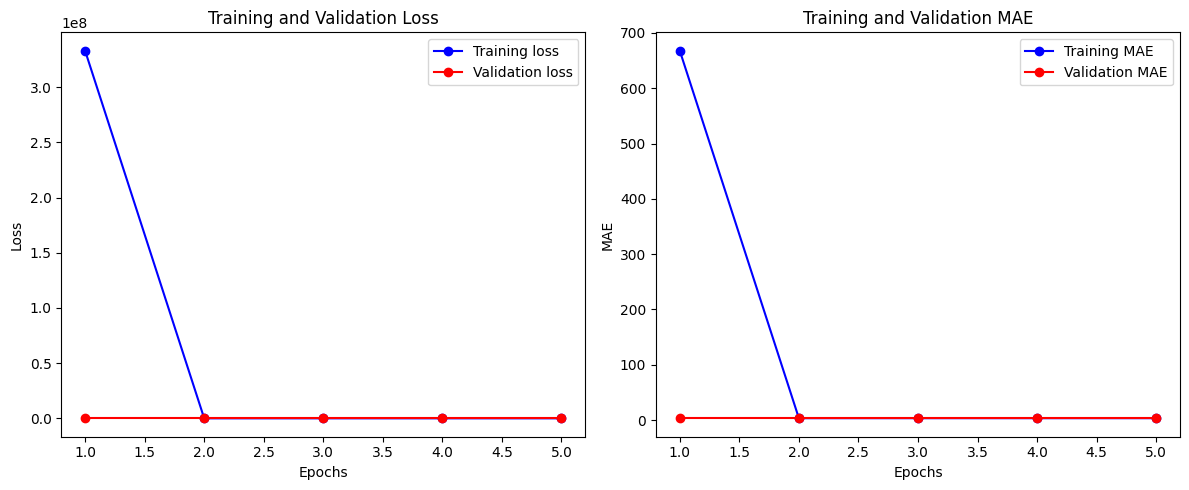

In [ ]:
import json
import matplotlib.pyplot as plt

# 加载保存的训练历史记录
history_path = '/content/drive/MyDrive/weather_forecast_project/models/training_history.json'
with open(history_path, "r") as f:
    history_dict = json.load(f)

loss = history_dict['loss']
val_loss = history_dict['val_loss']
mae = history_dict['mae']
val_mae = history_dict['val_mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


XAI分析

In [ ]:
import tensorflow as tf

# 加载已保存的模型
model_path = '/content/drive/MyDrive/weather_forecast_project/models/best_model.keras'
model = tf.keras.models.load_model(model_path)
print("模型加载成功！")


模型加载成功！


In [ ]:
import os
import numpy as np
import tensorflow as tf

# 定义 DataGenerator 类，用于创建 TensorFlow 数据集
class DataGenerator:
    def __init__(self, features_ds, target_da, sequence_length, batch_size=16, shuffle=True):
        self.features_ds = features_ds
        self.target_da = target_da
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.height = features_ds.shape[1]
        self.width = features_ds.shape[2]
        self.channels = features_ds.shape[3]

    def create_dataset(self, start_index, end_index):
        def generator():
            indices = np.arange(end_index - start_index - self.sequence_length)
            if self.shuffle:
                np.random.shuffle(indices)
            for i in indices:
                idx = start_index + i
                X = self.features_ds[idx:idx + self.sequence_length].astype(np.float32)
                target_value = float(self.target_da[idx + self.sequence_length])
                y = np.array([target_value], dtype=np.float32)
                yield X, y

        dataset = tf.data.Dataset.from_generator(
            generator,
            output_types=(tf.float32, tf.float32),
            output_shapes=(
                (self.sequence_length, self.height, self.width, self.channels),
                (1,)
            )
        )
        if self.shuffle:
            dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.batch(self.batch_size)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
        return dataset

# 定义数据加载和预处理函数
def load_and_preprocess_data(data_dir='/content/drive/MyDrive/weather_forecast_project/processed_data'):
    print("Loading data files...")
    features_files = sorted([f for f in os.listdir(data_dir) if f.startswith('processed_X_')])
    latest_features = features_files[-1]
    latest_target = f"processed_y_{latest_features.split('_', 2)[2]}"

    print(f"Loading features from: {latest_features}")
    print(f"Loading targets from: {latest_target}")

    features = np.load(os.path.join(data_dir, latest_features))
    targets = np.load(os.path.join(data_dir, latest_target))

    print(f"Raw data shapes: Features: {features.shape}, Targets: {targets.shape}")

    # 重塑特征数据
    height = 41
    width = 61
    channels = features.shape[1] // (height * width)
    features_reshaped = features.reshape(-1, height, width, channels)
    print(f"Reshaped features shape: {features_reshaped.shape}")

    total_samples = len(features)
    train_size = int(total_samples * 0.7)
    valid_size = int(total_samples * 0.15)

    # 计算测试集起始和结束索引
    valid_end = train_size + valid_size
    test_start = valid_end
    test_end = total_samples

    return features_reshaped, targets, (test_start, test_end)

# 主流程：加载数据、创建测试集并提取单个样本
def main_procedure():
    features, targets, (test_start, test_end) = load_and_preprocess_data()
    sequence_length = 30
    batch_size = 16

    data_gen = DataGenerator(features, targets, sequence_length, batch_size=batch_size, shuffle=False)
    test_dataset = data_gen.create_dataset(test_start, test_end)
    print("测试数据集创建完成。")

    sample_batch = next(iter(test_dataset.take(1)))
    sample_data, sample_target = sample_batch

    print("获取的样本数据形状:", sample_data.shape)
    print("获取的样本目标形状:", sample_target.shape)

    return sample_data, sample_target

if __name__ == "__main__":
    # 指定保存目录和文件路径
    save_dir = '/content/drive/MyDrive/weather_forecast_project/saved_sample_data'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    sample_data_path = os.path.join(save_dir, 'sample_data.npy')
    sample_target_path = os.path.join(save_dir, 'sample_target.npy')

    # 检查是否已有保存的样本数据
    if os.path.exists(sample_data_path) and os.path.exists(sample_target_path):
        sample_data = np.load(sample_data_path)
        sample_target = np.load(sample_target_path)
        print(f"已加载保存的样本数据：{sample_data_path} 和 {sample_target_path}")
    else:
        sample_data, sample_target = main_procedure()
        # 保存提取的样本数据
        np.save(sample_data_path, sample_data.numpy())
        np.save(sample_target_path, sample_target.numpy())
        print(f"样本数据已保存至：{sample_data_path} 和 {sample_target_path}")


已加载保存的样本数据：/content/drive/MyDrive/weather_forecast_project/saved_sample_data/sample_data.npy 和 /content/drive/MyDrive/weather_forecast_project/saved_sample_data/sample_target.npy


In [ ]:
# 1. 首先导入所需库
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [ ]:
# 2. 设置路径和加载模型
def load_model_and_data():
    try:
        # 设置路径
        model_path = '/content/drive/MyDrive/weather_forecast_project/models/best_model.keras'
        sample_data_path = '/content/drive/MyDrive/weather_forecast_project/saved_sample_data/sample_data.npy'
        sample_target_path = '/content/drive/MyDrive/weather_forecast_project/saved_sample_data/sample_target.npy'

        # 加载模型
        model = tf.keras.models.load_model(model_path)
        print("模型加载成功！")
        print("\n模型结构：")
        model.summary()

        # 加载并处理样本数据
        sample_data = np.load(sample_data_path)
        sample_target = np.load(sample_target_path)
        print(f"\n样本数据形状: {sample_data.shape}, 样本目标形状: {sample_target.shape}")

        # 确保数据维度正确
        if sample_data.ndim == 4:
            sample_data = np.expand_dims(sample_data, axis=0)

        single_sample = sample_data[0:1]
        print(f"单个样本形状: {single_sample.shape}")

        return model, single_sample, sample_target

    except Exception as e:
        print(f"加载模型或数据时出错: {str(e)}")
        return None, None, None

In [ ]:
def compute_gradcam(model, single_sample):
    try:
        print("开始计算Grad-CAM...")

        # 1. 确保数据格式正确
        if not isinstance(single_sample, tf.Tensor):
            single_sample = tf.convert_to_tensor(single_sample, dtype=tf.float32)
        print(f"输入tensor形状: {single_sample.shape}")

        # 2. 获取卷积层
        conv_layer = None
        for layer in model.layers:
            if 'conv3d_3' in layer.name:
                conv_layer = layer
                break

        if conv_layer is None:
            raise ValueError("未找到conv3d_3层")

        # 3. 使用GradientTape跟踪梯度
        with tf.GradientTape() as tape:
            tape.watch(single_sample)  # 确保追踪输入

            # 前向传播
            x = single_sample
            conv_output = None

            # 记录中间输出
            for layer in model.layers:
                x = layer(x)
                if layer == conv_layer:
                    conv_output = x
                    tape.watch(conv_output)  # 追踪卷积层输出

            prediction = x  # 最终预测结果

            if conv_output is None:
                raise ValueError("未能获取卷积层输出")

            # 打印调试信息
            print(f"\n各层输出形状:")
            print(f"卷积层输出: {conv_output.shape}")
            print(f"最终预测: {prediction.shape}")

        # 4. 计算梯度
        grads = tape.gradient(prediction, conv_output)

        # 打印梯度信息
        print(f"\n梯度统计信息:")
        print(f"梯度形状: {grads.shape}")
        print(f"梯度范围: [{tf.reduce_min(grads):.6f}, {tf.reduce_max(grads):.6f}]")

        # 5. 计算特征权重
        pooled_grads = tf.reduce_mean(grads, axis=(1, 2, 3))
        print(f"池化后梯度形状: {pooled_grads.shape}")

        # 6. 加权求和生成CAM
        cam = tf.zeros(conv_output.shape[1:4])
        for i in range(pooled_grads.shape[-1]):
            cam += pooled_grads[0, i] * conv_output[0, :, :, :, i]

        # 7. 后处理
        cam = tf.maximum(cam, 0)  # ReLU

        # 添加小量防止除零
        eps = 1e-8
        cam_min = tf.reduce_min(cam, axis=(1,2), keepdims=True)
        cam_max = tf.reduce_max(cam, axis=(1,2), keepdims=True)
        cam_norm = (cam - cam_min) / (cam_max - cam_min + eps)

        # 打印CAM统计信息
        print(f"\nCAM统计信息:")
        print(f"CAM形状: {cam.shape}")
        print(f"原始CAM范围: [{tf.reduce_min(cam):.6f}, {tf.reduce_max(cam):.6f}]")
        print(f"归一化后CAM范围: [{tf.reduce_min(cam_norm):.6f}, {tf.reduce_max(cam_norm):.6f}]")

        print("Grad-CAM计算完成")
        return cam_norm

    except Exception as e:
        print(f"计算Grad-CAM时出错: {str(e)}")
        print("错误详细信息:")
        import traceback
        print(traceback.format_exc())
        return None

In [ ]:
def visualize_results(cam, save_dir):
    try:
        # 确保cam不是全零
        if np.all(cam.numpy() == 0):
            print("警告: CAM激活图全为0!")

        n_timesteps = cam.shape[0]
        plt.figure(figsize=(20, 4))

        for t in range(min(6, n_timesteps)):
            plt.subplot(1, 6, t+1)

            # 获取当前时间步的激活图
            heatmap = cam[t].numpy()

            # 打印激活图的统计信息
            print(f"\n时间步 {t} 统计信息:")
            print(f"最大值: {np.max(heatmap):.6f}")
            print(f"最小值: {np.min(heatmap):.6f}")
            print(f"平均值: {np.mean(heatmap):.6f}")
            print(f"标准差: {np.std(heatmap):.6f}")

            # 使用更合适的颜色映射和归一化
            plt.imshow(heatmap,
                      cmap='jet',
                      vmin=np.min(heatmap),
                      vmax=np.max(heatmap))

            plt.colorbar()
            plt.title(f'Time step {t}')
            plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'gradcam_heatmap.png'))
        plt.close()

        return n_timesteps

    except Exception as e:
        print(f"可视化结果时出错: {str(e)}")
        return None

In [ ]:
def main():
    try:
        # 1. 加载模型和数据
        print("正在加载模型和数据...")
        model, single_sample, sample_target = load_model_and_data()
        if model is None:
            return

        print(f"\n输入数据形状: {single_sample.shape}")
        print(f"模型输入形状: {model.input_shape}")
        print(f"模型层名称: {[layer.name for layer in model.layers]}")

        # 2. 计算Grad-CAM
        cam = compute_gradcam(model, single_sample)
        if cam is None:
            return

        # 3. 可视化结果
        save_dir = '/content/drive/MyDrive/weather_forecast_project/visualization'
        os.makedirs(save_dir, exist_ok=True)

        # 显示Grad-CAM结果
        n_timesteps = cam.shape[0]
        plt.figure(figsize=(15, 5))
        for t in range(min(6, n_timesteps)):
            plt.subplot(1, 6, t+1)
            plt.imshow(cam[t].numpy(), cmap='jet')
            plt.title(f'Time step {t}')
            plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'gradcam_heatmap.png'))
        plt.close()

        print(f"\n结果已保存到: {save_dir}")

    except Exception as e:
        print(f"执行过程中出错: {str(e)}")
        print("错误详细信息:")
        import traceback
        print(traceback.format_exc())

if __name__ == "__main__":
    main()

正在加载模型和数据...
模型加载成功！

模型结构：


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_2 (Conv3D)                    │ (None, 28, 39, 59, 32)      │          15,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 14, 19, 29, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 12, 17, 27, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 6, 8, 13, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 39936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,111,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,549,029 (59.31 MB)

 Trainable params: 5,183,009 (19.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,366,020 (39.54 MB)


样本数据形状: (16, 30, 41, 61, 18), 样本目标形状: (16, 1)
单个样本形状: (1, 30, 41, 61, 18)

输入数据形状: (1, 30, 41, 61, 18)
模型输入形状: (None, 30, 41, 61, 18)
模型层名称: ['conv3d_2', 'max_pooling3d_2', 'conv3d_3', 'max_pooling3d_3', 'flatten_1', 'dense_2', 'dropout_1', 'dense_3']
开始计算Grad-CAM...
输入tensor形状: (1, 30, 41, 61, 18)

各层输出形状:
卷积层输出: (1, 12, 17, 27, 64)
最终预测: (1, 1)

梯度统计信息:
梯度形状: (1, 12, 17, 27, 64)
梯度范围: [0.000000, 0.000000]
池化后梯度形状: (1, 64)

CAM统计信息:
CAM形状: (12, 17, 27)
原始CAM范围: [0.000000, 0.000000]
归一化后CAM范围: [0.000000, 0.000000]
Grad-CAM计算完成

结果已保存到: /content/drive/MyDrive/weather_forecast_project/visualization
